In [2]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [316]:
data = pd.read_csv('ds_salaries.csv', index_col='db_id')
df = data.loc[:, ['company_location', 'job_title', 'experience_level', 'salary_in_usd']]
X = df.drop('salary_in_usd', axis='columns')
y = df.salary_in_usd
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['company_location', 'job_title', 'experience_level']),
    remainder='passthrough'
)
clf = DecisionTreeRegressor( random_state=42)
pipe = make_pipeline(column_trans, clf)
pipe.fit(X_train, y_train)
importances = clf.feature_importances_

In [317]:
print(sum(importances[:50]), 
sum(importances[50:100]),
sum(importances[100:104]))
print(df['experience_level'].unique().shape)
column_trans.feature_names_in_
abs(cross_val_score(pipe, X_test, y_test, cv=10).mean())
model_score = pipe.score(X_test, y_test)
model_score

0.43881678729987644 0.5611832127001235 0
(4,)


0.11831437378708998

In [319]:
cross_val_score(pipe, X, y, cv=2).mean()

0.17095392165251716

In [292]:
column_trans.feature_names_in_

array(['company_location', 'job_title', 'experience_level'], dtype=object)

In [3]:
def salary_to_cag(salary):
    step = 10000
    mean_salary_begin = data.salary.mean() - step
    mean_salary_end = data.salary.mean() + step
    if salary < mean_salary_begin - step*3:
        return 'Low'
    if salary < mean_salary_begin:
        return 'Lower then mean'
    if salary < mean_salary_begin + step*3:
        return 'High'
    if salary > mean_salary_end:
        return 'Higher than mean'
    return 'Mean'

In [6]:
from sklearn.metrics import accuracy_score 
data = pd.read_csv('ds_salaries.csv', index_col='db_id')
data['salary_in_usd'] = data['salary_in_usd'].apply(salary_to_cag)
df = data.loc[:, ['company_location', 'job_title', 'experience_level', 'salary_in_usd']]
X = df.drop('salary_in_usd', axis='columns')
y = df.salary_in_usd
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['company_location', 'job_title', 'experience_level']),
    remainder='passthrough'
)
clf = DecisionTreeClassifier(random_state=42)
pipe = make_pipeline(column_trans, clf)
pipe.fit(X_train, y_train)
importances = clf.feature_importances_
predictions = pipe.predict(X_test) 
score = accuracy_score(y_test, predictions)
score

1.0

In [288]:
print(sum(importances[:50]), 
sum(importances[50:100]),
sum(importances[100:104]))

0.10409763889447826 0.8959023611055217 0


In [291]:
cross_val_score(pipe, X, y, cv=2, scoring='accuracy').mean()

0.9703513114469342

In [293]:
pipe.score(X_test, y_test)

1.0

In [310]:
from sklearn.preprocessing import StandardScaler 
data = pd.read_csv('ds_salaries.csv', index_col='db_id')
df = data.loc[:, ['company_location', 'job_title', 'experience_level', 'salary_in_usd']]
X = df.drop('salary_in_usd', axis='columns')
y = df.salary_in_usd
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)
column_trans = make_column_transformer(
   # (StandardScaler(), ['salary_in_usd']),
    (OneHotEncoder(handle_unknown='ignore'), ['company_location', 'job_title', 'experience_level']),
    remainder='passthrough'
)
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1)) 
y_test = scaler.fit_transform(y_test.values.reshape(-1, 1)) 
clf = DecisionTreeRegressor( random_state=42)
pipe = make_pipeline(column_trans, clf)
pipe.fit(X_train, y_train)
importances = clf.feature_importances_

In [313]:
print(sum(importances[:50]), 
sum(importances[50:100]),
sum(importances[100:104]))
#print(df['experience_level'].unique().shape)
column_trans.feature_names_in_
abs(cross_val_score(pipe, X_test, y_test, cv=10).mean())
model_score = pipe.score(X_test, y_test)
model_score

0.43886572434183746 0.5611342756581625 0


0.28744971241876693

In [315]:
cross_val_score(pipe, X, y, cv=2).mean()

0.17095392165251716

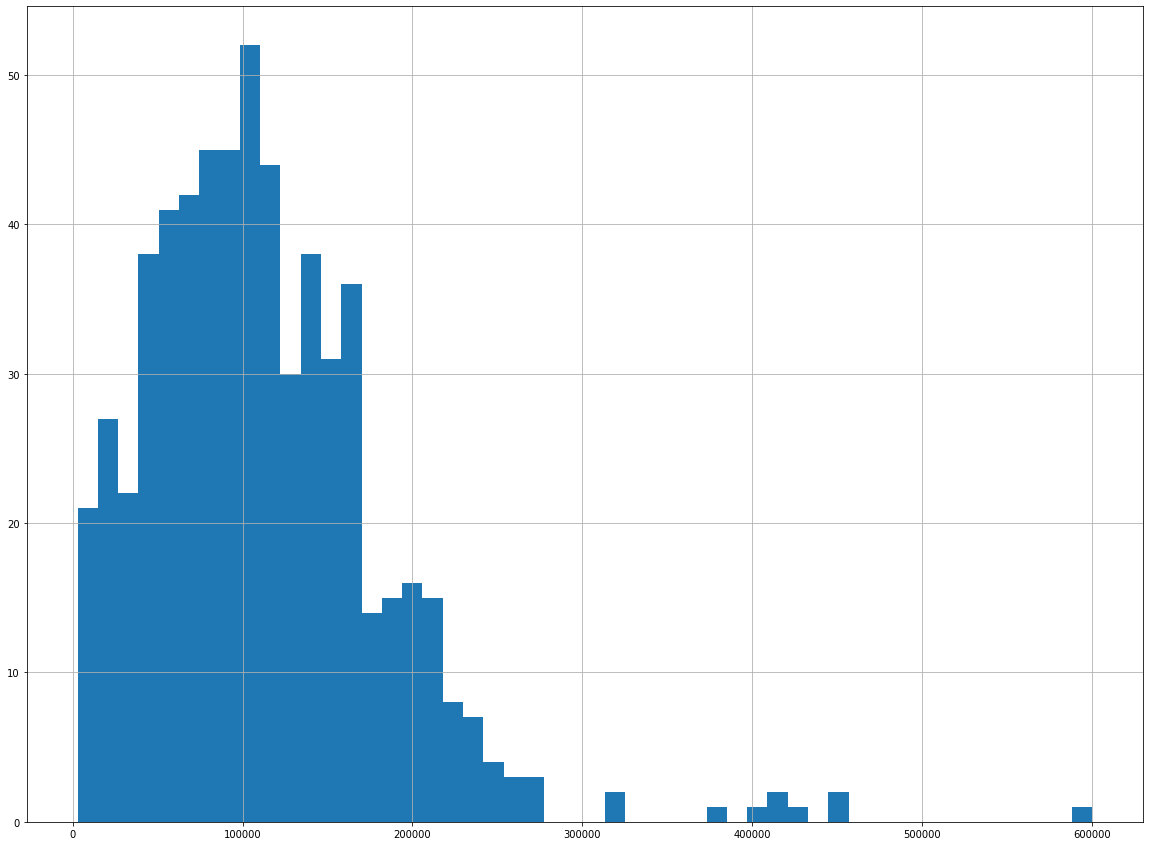

In [270]:
%matplotlib inline
import matplotlib.pyplot as plt
y.hist(bins=50, figsize=(20,15))
plt.show()

In [259]:
model_score = pipe.score(X_test, y_test)
model_score

0.5409836065573771